# 6.5 Unsupervised Machine Learning

### This script will include
__1. Import libraries and data__

__2. Conduct any necessary cleaning, manipulations, and reprocessing__

__3. Use the elbow technique__

__4. Make an informed decision about the number of clusters that will be used in the k-means algorithm__

__5. Run the k-means algorithm__

__6. Attach a new column to the dataframe with the resulting clusters__

__7. Create visualizaations using clustered data__

__8. Discuss how and why the clusters make sense (or if they don't)__

__9. Calculate the descriptive statistics for clusters using the `groupby()` function and discuss findings__

__10. Propose what these results could be useful for in future steps of an analytics pipeline__


### 1. Importing libraries and data

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
from sklearn.preprocessing import StandardScaler #import standard scale to standardize data
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
path = r'C:\Users\Victoria\Documents\veallen20\OneDrive\Desktop\Data Analytics Career Foundry\6.0 Advanced Analytics and Dashboard Design\Bambino 2.0\02 Data\Cleaned Data'

In [4]:
df = pd.read_csv(os.path.join(path, 'baseball_all.csv'))

In [5]:
df.shape

(1480, 30)

In [6]:
df.head()

,Unnamed: 0,rank,combined_key,name,year,city,state,country,bats,throws,...,league,games,war,actual_salary,league_r,bats_r,throws_r,team_sr,team_pr,position_r
0,0,1,"Mike Trout, 2019",Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,...,AL,134,7.9,17666667.0,0,0,0,12,12,8
1,1,1,"Mike Trout, 2020",Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,...,AL,53,1.8,37666666.0,0,0,0,12,12,8
2,2,1,"Mike Trout, 2021",Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,...,AL,36,1.8,37116667.0,0,0,0,12,12,8
3,3,1,"Mike Trout, 2022",Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,...,AL,119,6.3,37116666.0,0,0,0,12,12,8
4,4,1,"Mike Trout, 2023",Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,...,AL,81,3.0,37116667.0,0,0,0,12,12,8


### 2.  Conduct any necessary cleaning, manipulations, and reprocessing

In [7]:
#Drop 'Unnamed: 0'
df = df.drop(columns=['Unnamed: 0'])

In [8]:
df.head()

,rank,combined_key,name,year,city,state,country,bats,throws,team_signed,...,league,games,war,actual_salary,league_r,bats_r,throws_r,team_sr,team_pr,position_r
0,1,"Mike Trout, 2019",Mike Trout,2019,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,134,7.9,17666667.0,0,0,0,12,12,8
1,1,"Mike Trout, 2020",Mike Trout,2020,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,53,1.8,37666666.0,0,0,0,12,12,8
2,1,"Mike Trout, 2021",Mike Trout,2021,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,36,1.8,37116667.0,0,0,0,12,12,8
3,1,"Mike Trout, 2022",Mike Trout,2022,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,119,6.3,37116666.0,0,0,0,12,12,8
4,1,"Mike Trout, 2023",Mike Trout,2023,"Vineland, New Jersey",New Jersey,United States,R,R,LAA,...,AL,81,3.0,37116667.0,0,0,0,12,12,8


In [9]:
# Create new column 'ts_mil' that represents total salary in millions
df['ts_mil'] = df['total_salary']/1000000

In [10]:
#Crete new column 'as_mil' that represents actual salary in millions
df['as_mil'] = df['actual_salary']/1000000

In [11]:
df.columns

Index(['rank', 'combined_key', 'name', 'year', 'city', 'state', 'country',
       'bats', 'throws', 'team_signed', 'team_locale', 'team_locale_county',
       'position', 'contract_start', 'contract_end', 'contract_length',
       'total_salary', 'age', 'team_played', 'league', 'games', 'war',
       'actual_salary', 'league_r', 'bats_r', 'throws_r', 'team_sr', 'team_pr',
       'position_r', 'ts_mil', 'as_mil'],
      dtype='object')

In [12]:
#Use `describe()` to determine 'non-categorical' variables
df.describe()

,rank,year,contract_start,contract_end,contract_length,total_salary,age,games,war,actual_salary,league_r,bats_r,throws_r,team_sr,team_pr,position_r,ts_mil,as_mil
count,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1.480000e+03,1480.000000,1480.000000,1480.000000,1.480000e+03,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000,1480.000000
mean,154.708784,2014.386486,2012.052703,2017.478378,6.124324,1.113677e+08,31.655405,88.313514,2.447500,1.576419e+07,0.514189,0.451351,0.175676,14.202703,14.258784,4.815541,111.367668,15.764195
std,93.875983,6.378152,6.543653,6.769923,1.893572,6.410005e+07,3.199292,54.762123,2.455493,8.128917e+06,0.499968,0.626493,0.380673,8.686610,8.629630,3.378795,64.100046,8.128917
min,1.000000,1997.000000,1997.000000,2001.000000,2.000000,5.200000e+07,21.000000,1.000000,-3.300000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,52.000000,0.000000
25%,73.000000,2010.000000,2007.000000,2012.000000,5.000000,6.600000e+07,30.000000,32.000000,0.600000,1.110000e+07,0.000000,0.000000,0.000000,6.000000,6.000000,1.000000,66.000000,11.100000
50%,151.500000,2015.500000,2013.000000,2018.000000,6.000000,8.525000e+07,32.000000,97.000000,2.100000,1.500000e+07,1.000000,0.000000,0.000000,14.000000,14.000000,5.000000,85.250000,15.000000
75%,238.000000,2020.000000,2017.000000,2023.000000,7.000000,1.375000e+08,34.000000,143.000000,4.000000,2.012500e+07,1.000000,1.000000,0.000000,22.000000,22.000000,8.000000,137.500000,20.125000
max,320.000000,2023.000000,2023.000000,2034.000000,14.000000,4.265000e+08,41.000000,163.000000,11.700000,4.333333e+07,1.000000,2.000000,1.000000,29.000000,31.000000,11.000000,426.500000,43.333333


In [13]:
#Create subset without categorical variables to conduct k-means, excluding 'total_salary' and 'actual_salary' and using new derived variables in their place
df_2 = df[['rank', 'year', 'contract_start', 'contract_end', 'contract_length', 'age', 'games', 'war', 'league_r', 'bats_r', 'throws_r', 'team_sr', 'team_pr', 'position_r', 'ts_mil', 'as_mil']]

__Standardizing the data using sci-kit learn Standard scaler

In [14]:
df_s = df_2

In [15]:
scaler= StandardScaler()

In [16]:
df_s = scaler.fit_transform(df_s)

In [17]:
df_ss = pd.DataFrame(df_s)

In [18]:
df_ss.head(1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
0,-1.637913,0.723575,1.062044,1.850221,3.104008,-1.455628,0.834554,2.221282,-1.028793,-0.720685,-0.461644,-0.25366,-0.261836,0.942802,4.917919,0.234117


In [19]:
df_ss.rename(columns = {0 : 'rank', 1: 'year', 2: 'contract_start', 3: 'contract_end', 4: 'contract_length', 5 : 'age', 6: 'games', 7: 'war', 8: 'league_r', 9:'bats_r', 10:'throws_r', 11:'team_sr', 12:'team_pr', 13:'position_r', 14:'ts_mil', 15:'as_mil' }, inplace = True)

In [20]:
df_ss.head(1)

,rank,year,contract_start,contract_end,contract_length,age,games,war,league_r,bats_r,throws_r,team_sr,team_pr,position_r,ts_mil,as_mil
0,-1.637913,0.723575,1.062044,1.850221,3.104008,-1.455628,0.834554,2.221282,-1.028793,-0.720685,-0.461644,-0.25366,-0.261836,0.942802,4.917919,0.234117


In [21]:
df_ss.describe()

,rank,year,contract_start,contract_end,contract_length,age,games,war,league_r,bats_r,throws_r,team_sr,team_pr,position_r,ts_mil,as_mil
count,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1.480000e+03,1480.000000,1.480000e+03,1.480000e+03,1.480000e+03
mean,-7.681543e-17,-9.467502e-15,1.295300e-14,-1.290499e-14,-1.152231e-16,-5.041013e-16,1.920386e-17,-9.601929e-17,-1.920386e-17,-1.440289e-17,-4.800964e-18,-5.761157e-17,0.000000,-3.840772e-17,-1.536309e-16,7.681543e-17
std,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338e+00,1.000338,1.000338e+00,1.000338e+00,1.000338e+00
min,-1.637913e+00,-2.726866e+00,-2.301129e+00,-2.434880e+00,-2.178802e+00,-3.331677e+00,-1.594953e+00,-2.341462e+00,-1.028793e+00,-7.206850e-01,-4.616435e-01,-1.635564e+00,-1.652864,-1.425706e+00,-9.264851e-01,-1.939929e+00
25%,-8.706849e-01,-6.879688e-01,-7.724142e-01,-8.094967e-01,-5.939591e-01,-5.176036e-01,-1.028677e+00,-7.526490e-01,-1.028793e+00,-7.206850e-01,-4.616435e-01,-9.446119e-01,-0.957350,-1.129642e+00,-7.080027e-01,-5.739721e-01
50%,-3.419265e-02,1.746415e-01,1.448147e-01,7.707591e-02,-6.567817e-02,1.077461e-01,1.586758e-01,-1.415673e-01,9.720131e-01,-7.206850e-01,-4.616435e-01,-2.334296e-02,-0.029998,5.461172e-02,-4.075893e-01,-9.404122e-02
75%,8.875472e-01,8.804135e-01,7.563007e-01,8.158864e-01,4.626028e-01,7.330957e-01,9.989564e-01,6.324696e-01,9.720131e-01,8.760423e-01,-4.616435e-01,8.979260e-01,0.897354,9.428023e-01,4.078182e-01,5.366372e-01
max,1.761335e+00,1.350928e+00,1.673530e+00,2.441270e+00,4.160569e+00,2.921820e+00,1.364296e+00,3.769356e+00,9.720131e-01,2.472770e+00,2.166174e+00,1.704036e+00,1.940625,1.830993e+00,4.917919e+00,3.392636e+00


### 3. Use the elbow technique

__Using the elbow technique on df__

In [22]:
num_cl = range(1, 10) # Defines the range of potential clusters in the data.
kmeans = [KMeans(n_clusters=i) for i in num_cl] # Defines k-means clusters in the range assigned above.

In [23]:
score = [kmeans[i].fit(df_ss).score(df_ss) for i in range(len(kmeans))] 

score

C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set 

[-23679.999999999996,
 -20005.290210859035,
 -17744.287495060224,
 -16604.274077474558,
 -15621.490425374266,
 -14945.906848121185,
 -14446.96074502158,
 -13845.67514700642,
 -13388.675953213291]

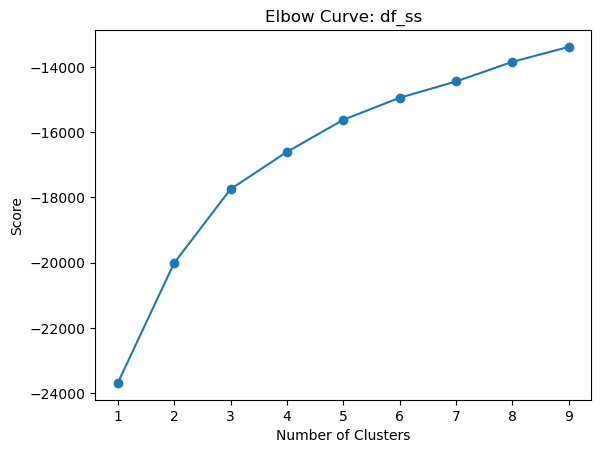

In [24]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score, marker = 'o')
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve: df_ss')
pl.show()

### 4. Make an informed decision about the number of clusters that will be used in the k-means algorithm

__Based on the Elbow Curve: df_ss chart I will use 5 clusters because after 5, the slope of the curve begins to flatten__

### 5. Run the k-means algorithm

In [25]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 5) 

In [26]:
# Fit the k-means object to the data.

kmeans.fit(df_2)

C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


KMeans(n_clusters=5)

### 6. Attach a new column to the dataframe with the resulting clusters

In [27]:
df_2['clusters'] = kmeans.fit_predict(df_2)

C:\Users\Victoria\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
C:\Users\Victoria\AppData\Local\Temp\ipykernel_22364\1948498210.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2['clusters'] = kmeans.fit_predict(df_2)


In [28]:
df_2.head()

,rank,year,contract_start,contract_end,contract_length,age,games,war,league_r,bats_r,throws_r,team_sr,team_pr,position_r,ts_mil,as_mil,clusters
0,1,2019,2019,2030,12,27,134,7.9,0,0,0,12,12,8,426.5,17.666667,4
1,1,2020,2019,2030,12,28,53,1.8,0,0,0,12,12,8,426.5,37.666666,4
2,1,2021,2019,2030,12,29,36,1.8,0,0,0,12,12,8,426.5,37.116667,4
3,1,2022,2019,2030,12,30,119,6.3,0,0,0,12,12,8,426.5,37.116666,4
4,1,2023,2019,2030,12,31,81,3.0,0,0,0,12,12,8,426.5,37.116667,4


In [29]:
df_2['clusters'].value_counts()

clusters
1    357
0    329
2    315
3    286
4    193
Name: count, dtype: int64

### 7. Create some visualizations

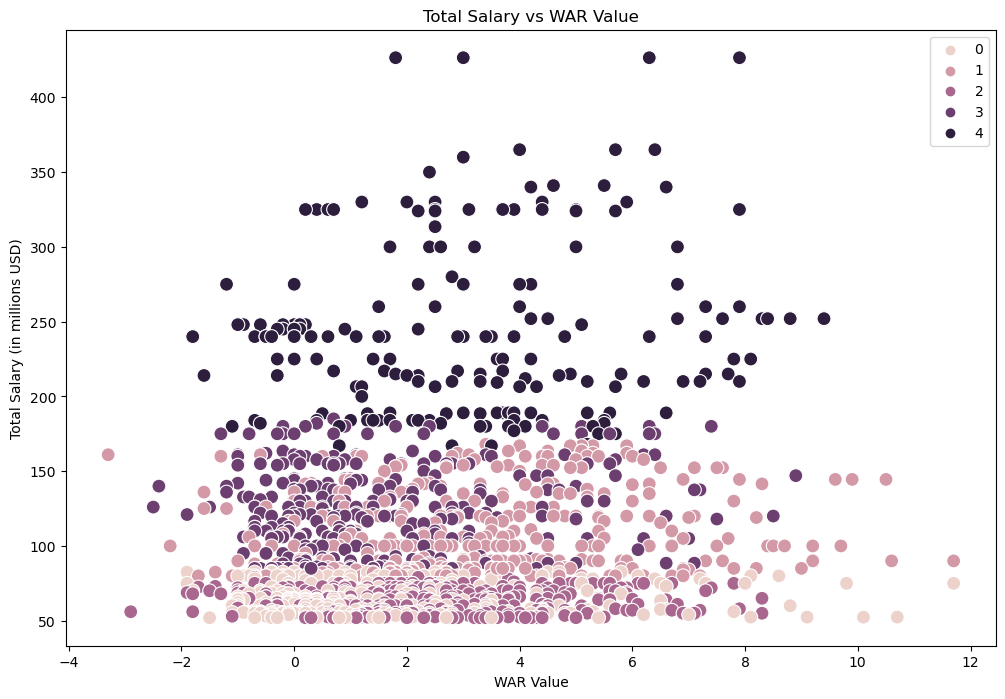

In [30]:
# Plot the clusters for the "war" and "ts_mil" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['war'], y=df_2['ts_mil'], hue=kmeans.labels_, s=100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('WAR Value') # Label x-axis.
plt.ylabel('Total Salary (in millions USD)') # Label y-axis.
pl.title('Total Salary vs WAR Value')
plt.show()

In [31]:
plt.savefig("6.5_ts_mil_war.png")

<Figure size 640x480 with 0 Axes>

##### Observations:
The cluster appear to be stratified horizontally. The stratification from lowest contract amount to highest appears to be 0, 3, 1 and 4, and 2. The war value is also stratified by clusters. Group 0 and 4 has no value greater than 8. These clusters make sense, but they aren't the strongest as most of the clusters are in the salary variable instead of war.

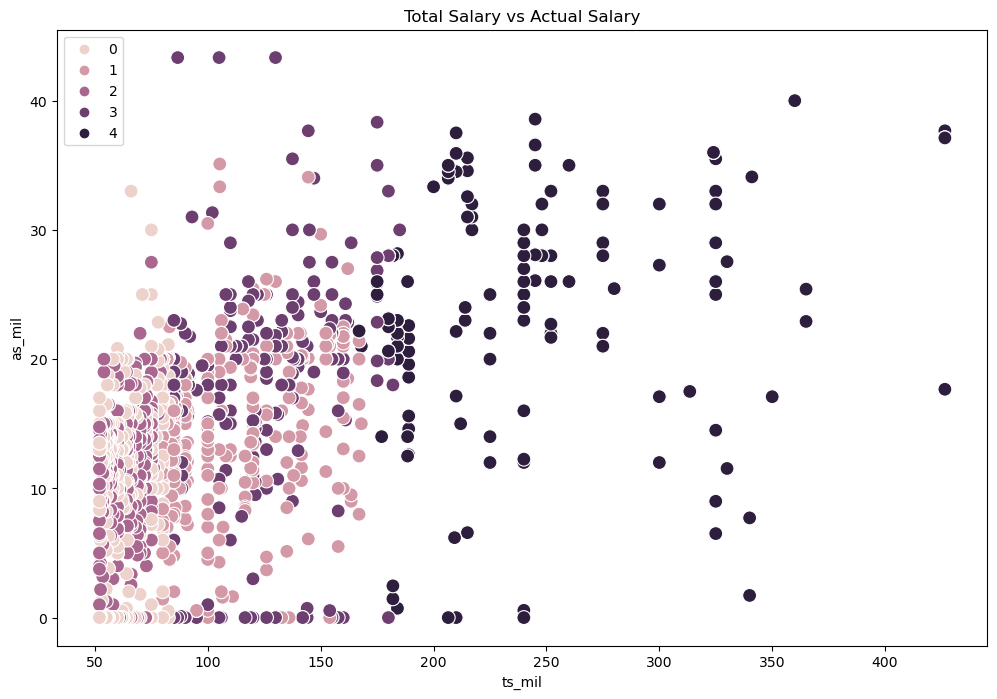

In [32]:
# Plot the clusters for the "ts_mil" and "as_mil" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['ts_mil'], y=df_2['as_mil'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('ts_mil') 
plt.ylabel('as_mil') 
pl.title('Total Salary vs Actual Salary')
plt.show()

In [33]:
plt.savefig("6.5_ts_mil_as_mil.png")

<Figure size 640x480 with 0 Axes>

##### Observations:
These clusters make sense. They show that in general actual salaries correlate to total salaries.

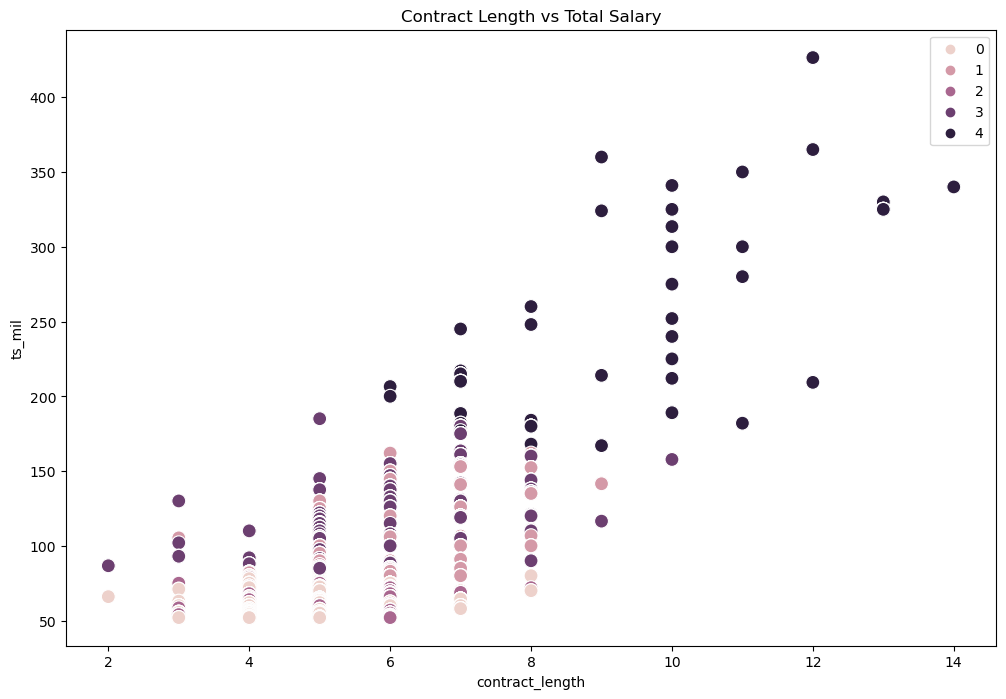

<Figure size 640x480 with 0 Axes>

In [34]:
# Plot the clusters for the "contract_length" and "ts_mil" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['contract_length'], y=df_2['ts_mil'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('contract_length') 
plt.ylabel('ts_mil') 
pl.title('Contract Length vs Total Salary')
plt.show()

plt.savefig("6.5_contract_length_ts_mil.png")

##### Observations:
These clusters make sense, for example, most of cluster 2 has a contract greater then 6 years. 

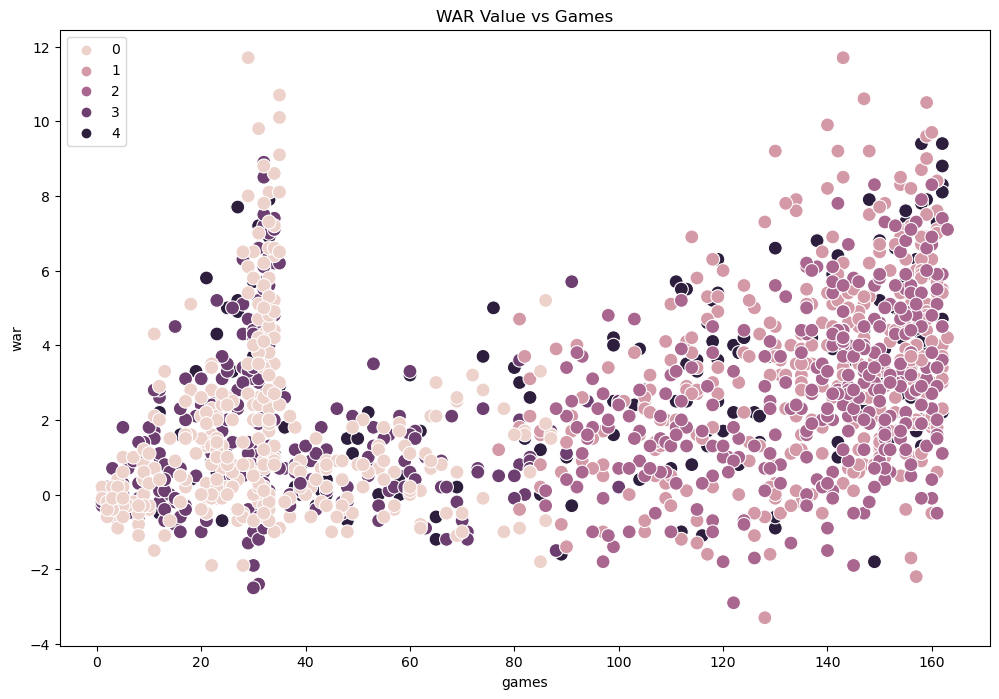

<Figure size 640x480 with 0 Axes>

In [35]:
# Plot the clusters for the "games" and "position_r" variables.

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_2['games'], y=df_2['war'], hue=kmeans.labels_, s=100)

ax.grid(False) 
plt.xlabel('games') 
plt.ylabel('war') 
pl.title('WAR Value vs Games')
plt.show()

plt.savefig("6.5_war_games.png")

##### Observations:
These clusters make sense.

### 9. Calculate the descriptive statistics for clusters using the groupby() function and discuss findings

In [41]:
#create cluster variable to look at descriptive statistics
df_2.loc[df_2['clusters'] == 4, 'cluster'] = 'dark purple'
df_2.loc[df_2['clusters'] == 3, 'cluster'] = 'purple'
df_2.loc[df_2['clusters'] == 2, 'cluster'] = 'magenta'
df_2.loc[df_2['clusters'] == 1, 'cluster'] = 'pink'
df_2.loc[df_2['clusters'] == 0, 'cluster'] = 'light pink'

In [42]:
df_2.groupby('cluster').agg({'war':['mean', 'median'], 'ts_mil':['mean', 'median'], 'as_mil':['mean', 'median'], 'contract_length':['mean', 'median'], 'games':['mean', 'median'], 'age':['mean', 'median']})

war             ts_mil            as_mil             \
                 mean median        mean median       mean     median   
cluster                                                                 
dark purple  3.119171    3.0  244.662176  240.0  24.442084  25.000000   
light pink   1.613374    0.9   65.654468   64.0  11.944261  13.000000   
magenta      2.713968    2.7   63.741095   64.0  11.850457  12.666667   
pink         3.301681    3.1  111.483894  105.0  15.556524  16.000000   
purple       1.594056    0.9  126.314103  125.5  18.872207  20.000000   

            contract_length              games               age         
                       mean median        mean median       mean median  
cluster                                                                  
dark purple        9.217617   10.0   98.487047  113.0  31.564767   31.0  
light pink         4.772036    5.0   32.917933   32.0  31.896657   32.0  
magenta            5.152381    5.0  136.168254  143.0  31.187302   31.0  
pink               6.507003    6.0  134.955182  141.0  31.282913   31.0  
purple             6.185315    6.0   34.244755   31.0  32.419580   32.0

##### Observations: 

__light pink__

This cluster group has the lowest average war value (1.59), the second highest average total salary (126 million USD) and actual salary (18.8 million USD), median contract length (5.966), average games played per season at 33 (second lowest), and the average player age is 32.4. This group of players benefits from having high salaries, but they do not aid teams much (lowest war and second lowest games). So good for the players (more money), bad for teams (less results).

__magenta__

This cluster has the median war value (2.7), second lowest average total salary (64 million USD) and actual salary (11.8 million USD), second shortest contract length (5.2 years) average games played per season at 134 (highest), and average player age is 31.2. This group of players would be valued most by teams becuse they have higher performance than other groups with (most games and median war) with the second lowest salaries. Good for teams (low money, high results), and bad for players (low contract value). 

__dark purple__

This cluster has the second highest avg war value (3.1), highest average total salary (244 million USD) and actual salary (24.4 million USD), highest contract length (9 years), median average games playes (98), anf average age of 31.6 years. This group of players would benefit players the most (highest money, longest contract length) and be the second most beneficial to teams (second highest war, lowest number of games, but most money).

__pink__

This cluster group has the highest average war value (3.3), the second highest average total salary (112 million USD) and actual salary (15.6 million USD), the second longest contract length (6.5 years), average games playes 134 (second highest), and average player age 31.3. This group is the most favorable for players and fairly favorable for teams, too.

__purple__

This cluster group has the second lwoest average war value (1.6), the lowest average total salary (61 million USD) and actual salary (11.2 million USD), the shortest average contract length (4.7 years), lowest average number of games played (31), and average player age of 31.9. This group is the second least favorable for players and teams.

__Ranking clusters in favorable order for players__
1. magenta
2. dark purple
3. pink
4. purple
5. light pink


__Ranking clusters in favorable order for teams__
1. light pink
2. pink
3. magenta
4. purple
5. dark purple


### 10. Propose what these results could be useful for in future steps of an analytics pipeline
This analysis is more beneficial in terms of understanding the relationship between variables than the supervised machine learning. However, there still don't appear to be strong relationships between variables...

In [38]:
# export df
#df.to_csv(os.path.join(path, 'baseball_f.csv'))

In [39]:
#export with n = 5
#df_2.to_csv(os.path.join(path, 'baseball_f_5.csv'))

In [40]:
#export with n = 3
#df_2.to_csv(os.path.join(path, 'baseball_f_3.csv'))